In [1]:
#check UFOs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv('Datasets/UFO.csv')
df.dtypes
df.head()

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,0,10/10/1949 20:30,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1,10/10/1949 21:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,10/10/1955 17:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,3,10/10/1956 21:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,4,10/10/1960 20:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [2]:
#plt.hist(df['Season'])
#plt.hist(df['Month'])
#plt.hist(df['Year'])
df['Date_time'] = pd.to_datetime(df['Date_time'])
df['date_documented'] = pd.to_datetime(df['date_documented'])
#dropped description as text analysis is beyodnd the scope of this project.
df = df.drop('Description', axis=1) #drop column - ref: https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
df['counter']=1 #add counter column

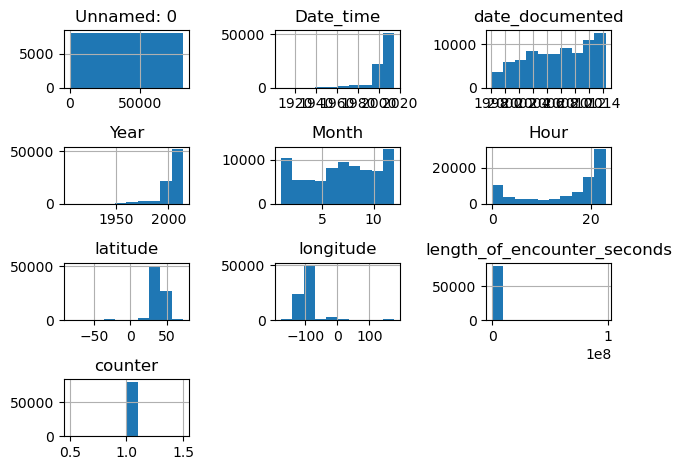

In [3]:
df.hist()
plt.tight_layout()


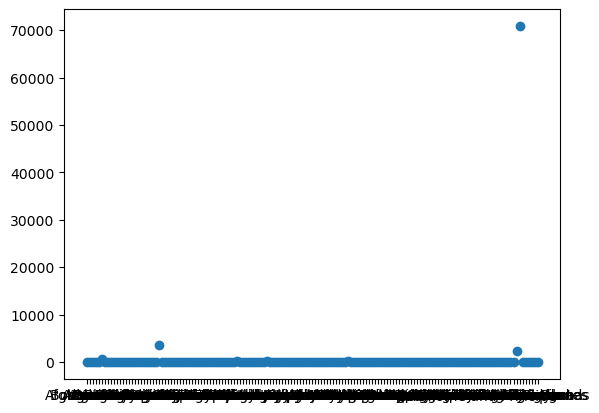

In [100]:
# Observations by Countries
countbycountry = df.groupby(['Country'],as_index=False).sum('counter')  #groupby ref: https://sparkbyexamples.com/pandas/pandas-groupby-multiple-columns/
                                                                        #reset index ref: https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
cbc=pd.DataFrame().assign(Countries=countbycountry['Country'], Observations=countbycountry['counter'])

plt.scatter(cbc['Countries'],cbc['Observations'])
#this looks silly.

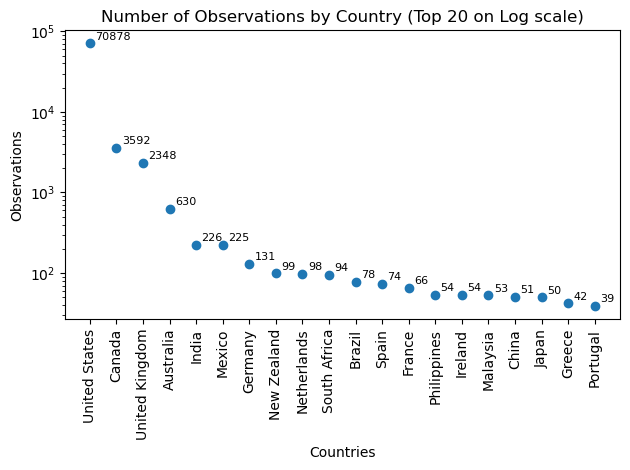

In [142]:
# Observations by Countries
countbycountry = df.groupby(['Country'], as_index=False).sum('counter')

# Create a DataFrame for visualization
cbc = pd.DataFrame().assign(Countries=countbycountry['Country'], Observations=countbycountry['counter']) #assign ref: https://sparkbyexamples.com/pandas/pandas-create-new-dataframe-by-selecting-specific-columns/#:~:text=You%20can%20create%20a%20new,added%20to%20the%20original%20ones.

# Rank countries based on the number of observations
sorted= cbc.sort_values(by=['Observations','Countries'], ascending=False) #sort ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
sorted['Rank']=sorted['Observations'].rank(ascending=False) # add ranking ref: https://stackoverflow.com/questions/30425796/pandas-rank-by-column-value
toplot=sorted.head(20) # get top 20 countries
plt.scatter(toplot['Countries'],toplot['Observations'])
plt.xlabel('Countries')
plt.ylabel('Observations')
plt.title('Number of Observations by Country (Top 20 on Log scale)')
plt.xticks(rotation='vertical')
plt.yscale('log') #logarithmic scale to compensate for US extreme high value

for i, col in enumerate(toplot['Observations']): #get each index and each value from Observations
    plt.text(i+0.2, col*1.05, col, ha='left', va='bottom', fontsize=8)   # plt.text˙(x_coordinate, y_coordinate, value, horizontal pos, vertical pos, fontsize)
                                                                    # chart data labels ref: https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/

plt.tight_layout()
plt.show()

